In [1]:
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
import pandas as pd
from sklearn import linear_model
import numpy as np
import seaborn as sns
from pylab import rcParams
import plotly.express as px
import warnings;
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
weather = pd.read_csv("weatherHistory.csv")
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 7.4+ MB


In [4]:
weather['Temperature (C)']

0         9.472222
1         9.355556
2         9.377778
3         8.288889
4         8.755556
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Temperature (C), Length: 96453, dtype: float64

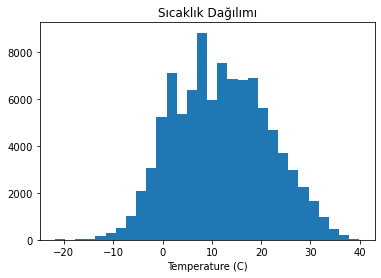

In [5]:
plt.hist(weather['Temperature (C)'], bins=30)
plt.title("Sıcaklık Dağılımı")
plt.xlabel("Temperature (C)")
plt.show()

In [6]:
Y = weather['Temperature (C)']
X = weather[["Humidity","Wind Speed (km/h)","Pressure (millibars)", "Wind Bearing (degrees)"]]

In [7]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01 -6.91759209e-04  4.04836936e-03]
Sabit değer (bias): 
 37.926438185285114


In [9]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:28:14   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
results.params

const                     37.926438
Humidity                 -32.496245
Wind Speed (km/h)         -0.201414
Pressure (millibars)      -0.000692
Wind Bearing (degrees)     0.004048
dtype: float64

Varsayım 2: Hata terimi ortalamada sıfır olmalıdır

In [11]:
X = weather[["Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)"]]
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Ortalama Hata : {}".format(np.mean(hatalar)))

Ortalama Hata : -3.866649545306205


Varsayım 3: homoscedasticity

In [12]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }

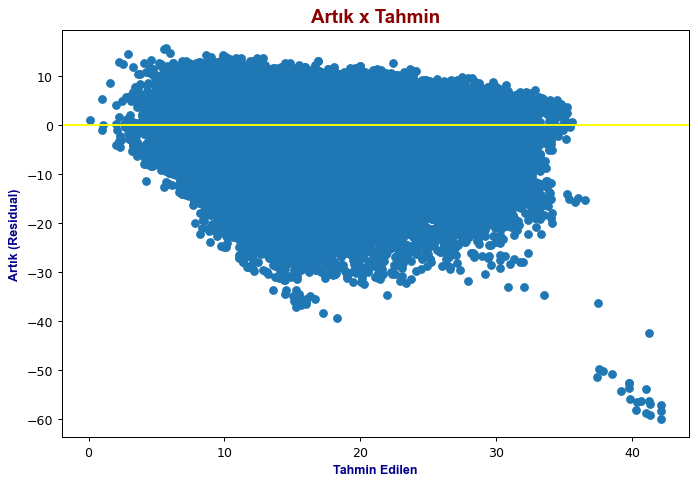

In [13]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0, color= "yellow")
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [14]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.21f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.21f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2541.53 ve p değeri : 0.000000000000000000000
Levene test değeri   : 2413.11 ve p değeri : 0.000000000000000000000


Varsayım 5: hata terimleri birbiriyle ilişkisiz olmalıdır

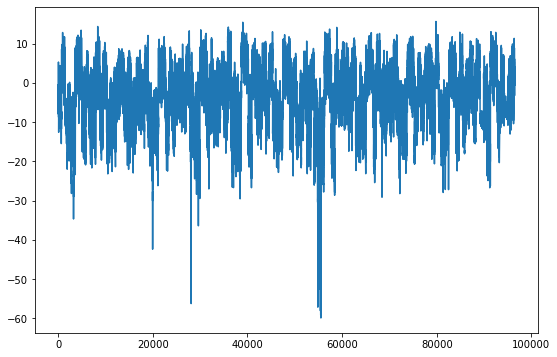

In [15]:
plt.figure(figsize=(9,6))
plt.plot(hatalar)
plt.show()

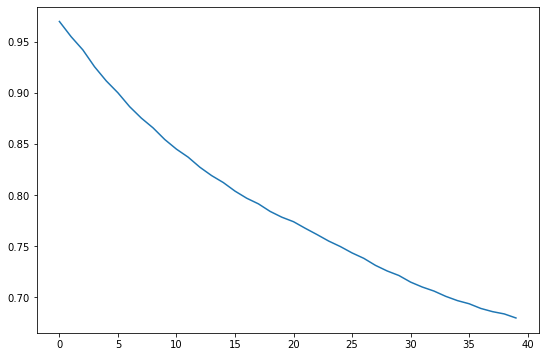

In [16]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

Varsayım 6: özellikler hatalarla korele olmamalıdır

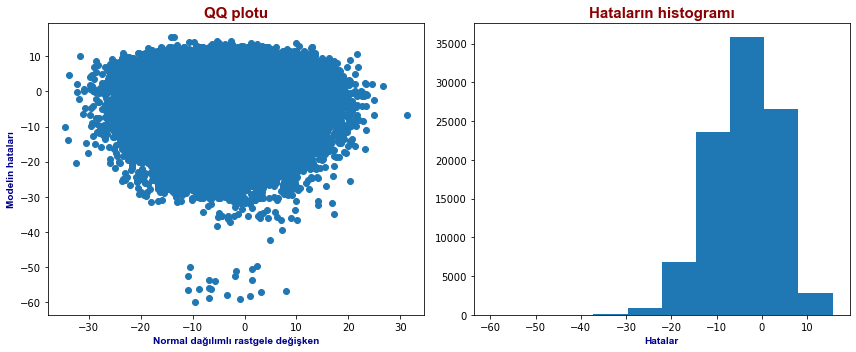

In [17]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 3833.4176128460485 ve p değeri : 0.0
Normal test değeri      : 3405.7784090075124  ve p değeri : 0.000000000000000000000000000000
